1) fundamentals
 - intro lecture
 - getting setup
 - basic python (list comprehensions)
 - numpy, linear algebra, calculus
 
2) classification and neural networks
 - what is classification
 - k-means on iris
 - k-means on mnist
 - diy neural net + iris

3) scaling up neural networks
 - keras + iris
 - validation 
 - keras + mnist
 - scaling up
 - keras + cifar problms
 - regression?
 
4) convnets
 - keras + cifar
 - overfitting + dropout
 - how neural nets are trained
 - reviewing optimizers

5) transfer learning


In [135]:
import numpy as np
import matplotlib.pyplot as plt

import itertools




Load Iris and shuffle

In [136]:
from sklearn.datasets import load_iris
iris = load_iris()


labels, data = iris.target, iris.data

nc = len(labels)
nf = len(iris.feature_names)

shuffle_order = np.random.permutation(len(labels))
data = data[shuffle_order, :]
labels = labels[shuffle_order]


View Iris (first 20 rows)

In [137]:
import numpy as np
from IPython.display import HTML, display
import tabulate


label_names = np.array([iris.target_names[l] for l in labels])
table_labels = np.array(['class']+iris.feature_names).reshape((1, 1+nf))
table_data = np.concatenate([np.array(label_names).reshape(nc, 1), data], axis=1)[0:20]

# display table
table_full = np.concatenate([table_labels, table_data], axis=0)
display(HTML(tabulate.tabulate(table_full, tablefmt='html')))


class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
versicolor,5.5,2.4,3.7,1.0
setosa,4.4,2.9,1.4,0.2
setosa,4.6,3.4,1.4,0.3
setosa,5.1,3.4,1.5,0.2
setosa,5.0,3.5,1.3,0.3
setosa,5.0,3.4,1.5,0.2
versicolor,5.5,2.5,4.0,1.3
virginica,6.0,3.0,4.8,1.8
versicolor,6.1,2.9,4.7,1.4
virginica,6.7,3.1,5.6,2.4


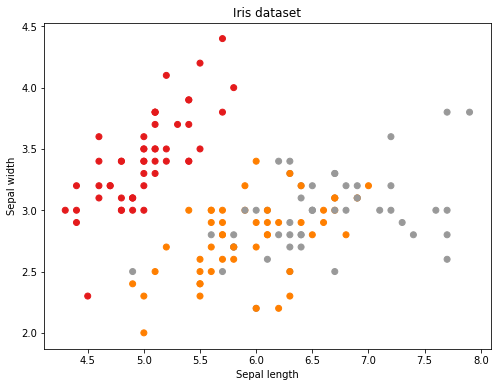

In [260]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')


Suppose we get a new point.

In [261]:
new_x, new_y = 6.5, 3.7

Let's plot it on the graph. What could its class be?

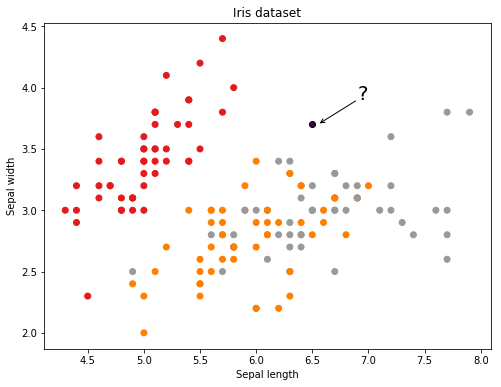

In [262]:
x, y, lab = data[:, 0], data[:, 1], labels

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

plt.scatter(new_x, new_y, c=0, cmap=None, edgecolor='k')
plt.annotate('?', (new_x+0.45, new_y+0.25), fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.annotate("", xytext=(new_x+0.4, new_y+0.2), xy=(new_x+0.05, new_y), arrowprops=dict(arrowstyle="->"))


Run k-means.

In [263]:
distances = np.sum((data[:,0:2] - [new_x, new_y])**2, axis=1)

closest_point = np.argmin(distances)

new_label = labels[closest_point]

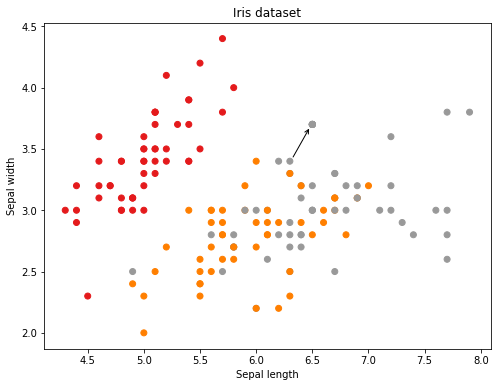

In [276]:
x = np.append(x, new_x)
y = np.append(y, new_y)
lab = np.append(lab, new_label)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.annotate("", xytext=(x[closest_point]+0.02, y[closest_point]+0.02), xy=(new_x-0.02, new_y-0.02), arrowprops=dict(arrowstyle="->"))


Label 2 is closest. 

Let's do an experiment. Let's split the dataset into two: 

In [309]:
n_train = 100

train_data, train_labels = data[:n_train, 0:2], labels[:n_train]
test_data, test_labels = data[n_train:, 0:2], labels[n_train:]



Let's view the smaller set.

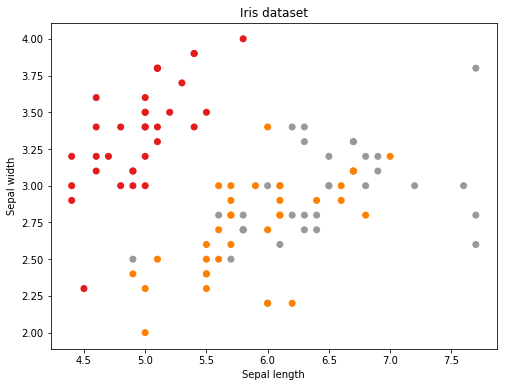

In [310]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')


Now let's plot the unknown points.

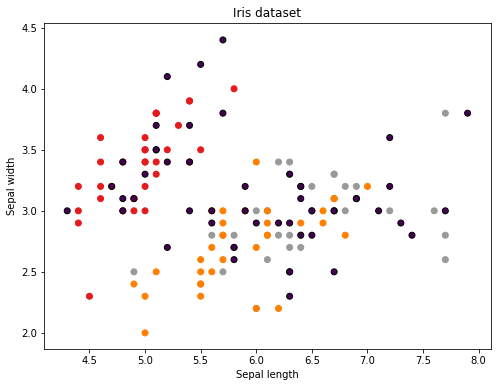

In [311]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.scatter(test_data[:,0], test_data[:,1], c=[0]*len(test_labels), cmap=None, edgecolor='k')


Let's get the points

In [312]:
distances = [ np.sum((train_data[:,0:2] - [x[0],x[1]])**2, axis=1) for x in test_data ]
closest_points = [ np.argmin(distance) for distance in distances ]
new_labels = [train_lab[c] for c in closest_points]

How did we do?

In [316]:
results = (new_labels == test_labels)
num_correct = sum(results)
accuracy = num_correct / len(correct)
print("accuracy %0.2f" % accuracy)

accuracy 0.78


A 78% accuracy. Not too bad for such a simple method.

Let's try it for a more complicated dataset.

In [168]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))


In [169]:

class Neural_Network(object):
    def __init__(self, n0, n1, n2):        
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        
        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)
        
    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y
  


In [170]:
net = Neural_Network(2, 3, 1)    

In [171]:
# normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100



print(X)
print(y)

print(X.shape)
print(y.shape)

[[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
[[0.75]
 [0.82]
 [0.93]]
(3, 2)
(3, 1)


In [108]:
y_pred = net.predict(X)

In [109]:
y_pred

array([[1.24821924],
       [0.92119703],
       [0.80569154]])

In [110]:


def mse(y_pred, y_actual):
    return sum((y_actual-y_pred)**2)


error = mse(y_pred, y)
print(error)


3.055789238394958


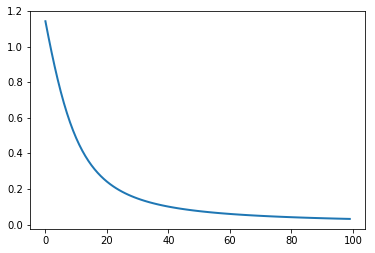

In [155]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = mse(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2) 
    
    for i, j in itertools.product(range(net.n0), range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = mse(y_pred, y)
        dw1[i][j] = (error - error_current) / w_delta

    for i, j in itertools.product(range(net.n1), range(net.n2)):
        net.W2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = mse(y_pred, y)
        dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2


net = Neural_Network(2, 3, 1)    


n_epochs = 100
learning_rate = 0.1

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


In [140]:
def sigmoid_deriv(z):
    return np.exp(-z) / ((1 + np.exp(-z))**2)


def get_gradient_2(net, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    y_current = self.forward(X)

    delta3 = np.multiply(-(y-y_current), sigmoid_deriv(net.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(net.a2.T, delta3) / X.shape[0]

    delta2 = np.dot(delta3, net.W2.T) * sigmoid_deriv(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2) / X.shape[0]
    return dJdW1, dJdW2

net = Neural_Network(2, 3, 1)    


n_epochs = 100
learning_rate = 0.1

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient_2(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


In [ ]:
TODO softmax

In [180]:

#import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.data[:, 2]
y = np.reshape(y, (len(y), 1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)



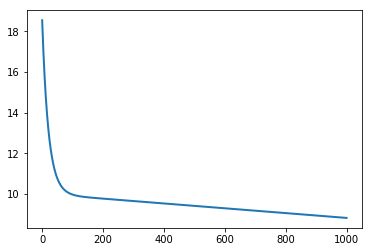

In [182]:
net = Neural_Network(2, 3, 1)    


X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)


n_epochs = 1000
learning_rate = 0.0001

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


In [195]:

#import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
labels = iris.target


# need to shuffle

shuffle_order = np.random.permutation(len(labels))
X = X[shuffle_order, :]
labels = labels[shuffle_order]


X = X/np.amax(X, axis=0)


In [196]:
y = np.zeros((labels.size, labels.max()+1))
y[np.arange(labels.size), labels] = 1


In [198]:
def softmax(y_pred, y_actual):
    return sum((y_actual-y_pred)**2)

# softmax
z = y_pred
z_exp = [math.exp(i) for i in z]

# categorical cross-entropy loss


n_classes = 3
net = Neural_Network(2, 3, n_classes)    


y_pred = net.predict(X)
print(y_pred)



[[-0.51250553 -2.39679166  0.47132639]
 [-0.54292477 -2.47303499  0.48257093]
 [-0.55697994 -2.50562414  0.47671609]
 [-0.54243528 -2.47390911  0.49015408]
 [-0.55213687 -2.49320486  0.47451724]
 [-0.55908867 -2.51360235  0.48657196]
 [-0.52475319 -2.42670532  0.47337532]
 [-0.5591054  -2.51077545  0.47657754]
 [-0.56853825 -2.53222927  0.47095282]
 [-0.55851974 -2.51438004  0.49412773]
 [-0.56489265 -2.52410012  0.47369404]
 [-0.56069049 -2.51390359  0.47398022]
 [-0.54406229 -2.47715577  0.48753925]
 [-0.5673997  -2.53386864  0.48595299]
 [-0.54730441 -2.48361278  0.48231971]
 [-0.52679816 -2.42900496  0.46322471]
 [-0.5659435  -2.52520093  0.46865578]
 [-0.58315287 -2.56865599  0.472252  ]
 [-0.57217905 -2.53740436  0.45834065]
 [-0.56331564 -2.5181134   0.46635092]
 [-0.52308866 -2.42336824  0.47596929]
 [-0.55432406 -2.50131154  0.48439205]
 [-0.51717542 -2.40794228  0.47115348]
 [-0.547788   -2.48270783  0.47476873]
 [-0.54766579 -2.47966852  0.46477622]
 [-0.52449637 -2.42350725

In [ ]:

def get_gradient(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = softmax(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2) 
    
    for i, j in itertools.product(range(net.n0), range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = softmax(y_pred, y)
        dw1[i][j] = (error - error_current) / w_delta

    for i, j in itertools.product(range(net.n1), range(net.n2)):
        net.W2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = softmax(y_pred, y)
        dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2



n_epochs = 100
learning_rate = 0.1

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


In [ ]:
import numpy as np

class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        return dJdW1, dJdW2

    def costFunctionPrimeManual(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        J1 = self.costFunction(X,y)
        delta = 1e-8
        
        
        dJdW1 = np.zeros((self.inputLayerSize,self.hiddenLayerSize))
        dJdW2 = np.zeros((self.hiddenLayerSize,self.outputLayerSize))

        
        W1copy = np.copy(self.W1)
        W2copy = np.copy(self.W2)
        
        for i in range(self.inputLayerSize):
            for j in range(self.hiddenLayerSize):
                self.W1 = np.copy(W1copy)
                self.W1[i][j] += delta
                J2 = self.costFunction(X,y)
                dj2 = (J2-J1) / delta
                dJdW1[i][j] = dj2
                
        for i in range(self.hiddenLayerSize):
            for j in range(self.outputLayerSize):
                self.W2 = np.copy(W2copy)
                self.W2[i][j] += delta
                J2 = self.costFunction(X,y)
                dj2 = (J2-J1) / delta
                dJdW2[i][j] = dj2
           
        self.W1 = np.copy(W1copy)
        self.W2 = np.copy(W2copy)
        
       
        return dJdW1, dJdW2

    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100


NN = Neural_Network()



learning_rate = 0.1

costs = []
for i in range(1000):
    dJdW1, dJdW2 = NN.costFunctionPrimeManual(X,y)
    NN.W1 = NN.W1 - learning_rate * dJdW1
    NN.W2 = NN.W2 - learning_rate * dJdW2
    cost3 = NN.costFunction(X, y)
    costs.append(cost3)
        

